# PREDICTING SURVIVAL IN TITANIC SHIP   
### Prediction of survival of people in titanic ship using three different methods :logistic regression,calculating the accuracy using sklearn accuracy score and also using KNN classification

## Importing libraries and dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv("titanic.csv")

In [3]:
data.shape

(887, 8)

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

### omiting the columns which are not in prediction

In [6]:
data.drop(["Name"],axis=1,inplace=True)

### checking that dataset contains any missing values or not

In [7]:
data.isnull().sum()

Survived                   0
Pclass                     0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

#### dataset does not contain any missing value already

### counting the number of male and female in the ship

In [8]:
data["Sex"].value_counts()

male      573
female    314
Name: Sex, dtype: int64

In [9]:
data.Survived = data.Survived.astype('int64')

### plotting the graphs of different columns to know the relation between them

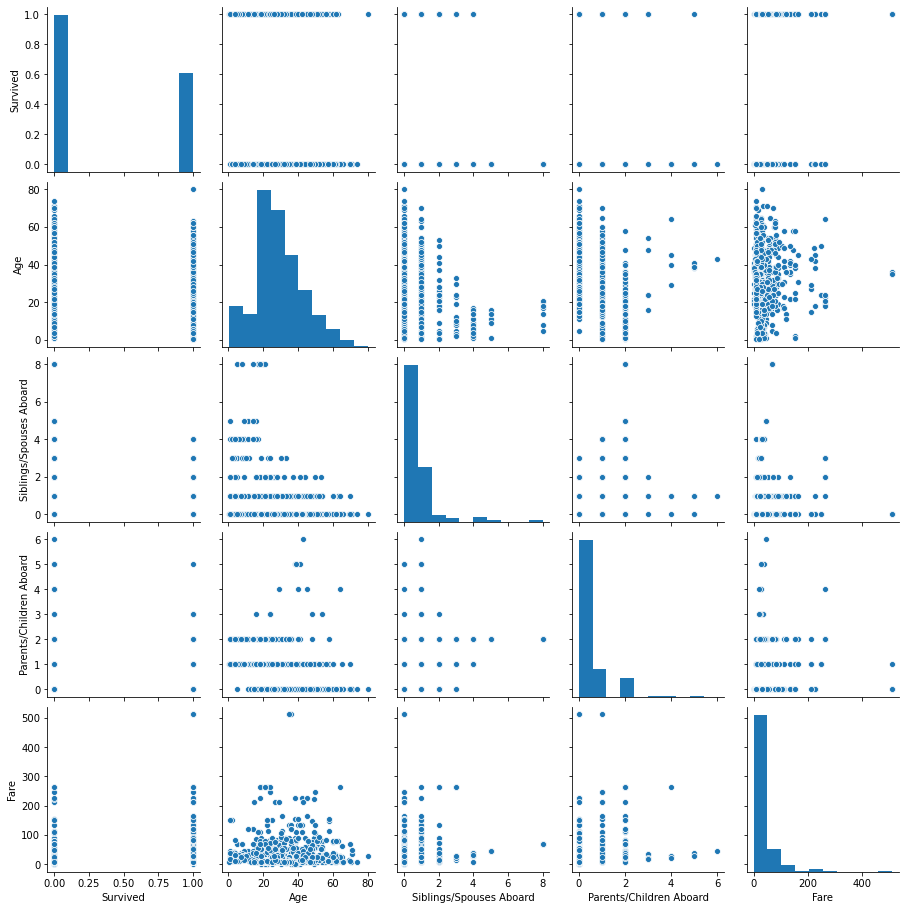

In [10]:
sns.pairplot(data[['Survived','Age','Siblings/Spouses Aboard','Parents/Children Aboard','Fare']])

### Categorical to Numerical - One Hot Encoding

#### Using get_dummies method

In [11]:
data = pd.get_dummies(data,columns=['Sex'],drop_first=True)
data.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


### Correlation 

In [12]:
data.corr()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,-0.542152
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.129507
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,0.091875
Siblings/Spouses Aboard,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,-0.113249
Parents/Children Aboard,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,-0.244337
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,-0.181137
Sex_male,-0.542152,0.129507,0.091875,-0.113249,-0.244337,-0.181137,1.000000


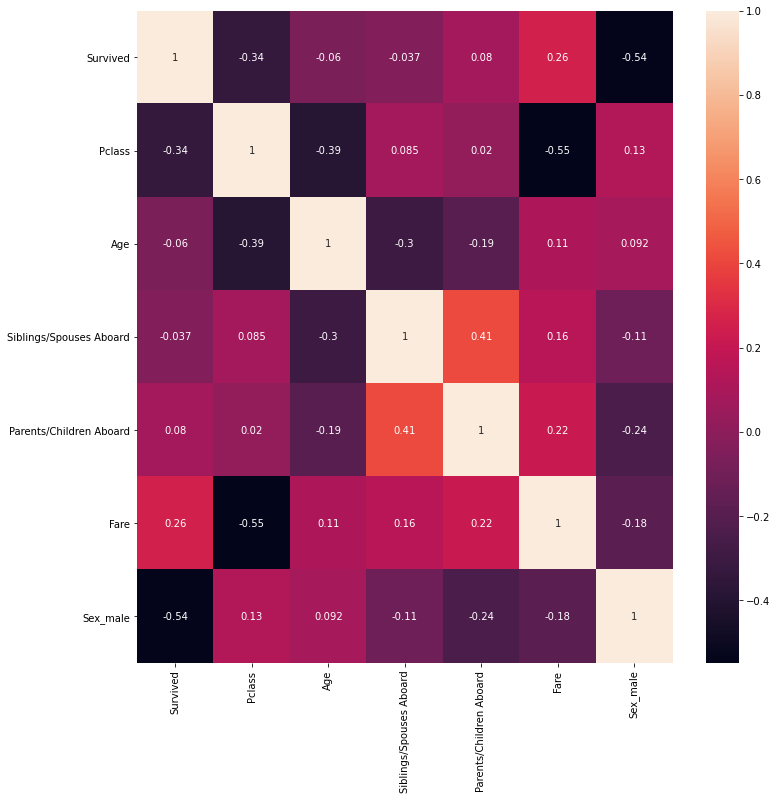

In [13]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)

### Train Test Split

In [14]:
X = data.drop('Survived',axis=1)
y= data.Survived

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=45,stratify=y, test_size= 0.3)

## LOGISTIC REGRESSION

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr = LogisticRegression()   # create LR object
lr.fit(X_train,y_train)     # training

print(' Training Model Accuracy : ', lr.score(X_train,y_train))   # train set 
print(' Test Model Accuracy : ', lr.score(X_valid,y_valid))   # test set 

 Training Model Accuracy :  0.8096774193548387
 Test Model Accuracy :  0.797752808988764


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_valid,lr.predict(X_valid))

array([[146,  18],
       [ 36,  67]], dtype=int64)

In [19]:
confusion_matrix(y_train,lr.predict(X_train))

array([[334,  47],
       [ 71, 168]], dtype=int64)

### Validation

In [20]:
X1 = data[['Pclass','Fare','Sex_male']]
X_train1,X_valid1,y_train1,y_valid1 = train_test_split(X1,y,random_state=0,stratify=y)
lr1 = LogisticRegression().fit(X_train1,y_train1)
confusion_matrix(y_valid1,lr1.predict(X_valid1))

array([[116,  20],
       [ 31,  55]], dtype=int64)

In [21]:
lr1.score(X_train1,y_train1), lr1.score(X_valid1,y_valid1)

(0.793984962406015, 0.7702702702702703)

#### accuracy for train part is 79% and validation is 77%

## RANDOM FOREST

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
RF = RandomForestClassifier(n_estimators=40, max_depth=5)

RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=40)

In [24]:
print(' Training Model Accuracy : ', RF.score(X_train,y_train))   # train set 
print(' Test Model Accuracy : ', RF.score(X_valid,y_valid))

 Training Model Accuracy :  0.8483870967741935
 Test Model Accuracy :  0.8239700374531835


In [25]:
confusion_matrix(y_valid,RF.predict(X_valid))

array([[152,  12],
       [ 35,  68]], dtype=int64)

#### Random Forest gives accuracy score 83%

### prediction using classification and calculating accuracy score 

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle

In [27]:
data=shuffle(data,random_state=42)

In [28]:
div=int(data.shape[0]/4)

In [29]:
train=data.loc[:3*div+1,:]

In [30]:
test=data.loc[3*div+1:]

In [31]:
train.shape,test.shape

((618, 7), (270, 7))

In [32]:
train.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
296,1,1,47.0,0,0,30.5000,1
682,0,2,25.0,1,2,41.5792,1
535,0,3,69.0,0,0,14.5000,1
644,1,1,56.0,0,0,35.5000,1
623,0,2,57.0,0,0,12.3500,1


In [33]:
test.head()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
664,0,3,49.0,0,0,7.775,1
571,0,3,16.0,0,0,8.050,1
633,0,3,32.0,0,0,7.925,1
742,0,3,16.0,1,1,20.250,1
262,0,3,21.0,0,0,7.750,0


In [34]:
test["Simple_mode"]=train["Survived"].mode()[0]
test["Simple_mode"].head()

<ipython-input-34-285e242eb3e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Simple_mode"]=train["Survived"].mode()[0]


664    0
571    0
633    0
742    0
262    0
Name: Simple_mode, dtype: int64

In [35]:
simple_mode_accuracy=accuracy_score(test["Survived"],test["Simple_mode"])

In [36]:
simple_mode_accuracy

0.6148148148148148

In [37]:
gender_mode=pd.crosstab(train["Survived"],train["Sex_male"])
gender_mode

Sex_male,0,1
Survived,,
0,51,329
1,158,80


In [38]:
test["gender_mode"]=test["Survived"]

<ipython-input-38-342dab2ec6f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["gender_mode"]=test["Survived"]


In [40]:
for i in test["Sex_male"].unique():
    test["gender_mode"][test["Sex_male"]==str(i)] = train["Survived"][train["Sex_male"]==str[i]].mode()[0]

TypeError: 'type' object is not subscriptable

In [41]:
gender_accuracy=accuracy_score(test["Survived"],test["gender_mode"])
gender_accuracy

1.0

In [42]:
data

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male
296,1,1,47.0,0,0,30.5000,1
682,0,2,25.0,1,2,41.5792,1
535,0,3,69.0,0,0,14.5000,1
644,1,1,56.0,0,0,35.5000,1
623,0,2,57.0,0,0,12.3500,1
...,...,...,...,...,...,...,...
106,1,3,29.0,0,0,7.7750,1
270,1,2,41.0,0,1,19.5000,0
860,0,2,24.0,0,0,13.0000,1
435,0,1,64.0,1,4,263.0000,1


### accuracy is about 61%

### Prediction using KNN classifiaction

In [43]:
x=data.drop(["Survived"],axis=1)

In [44]:
y=data["Survived"]

### Feature Scaling using MinMaxScaler

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler=MinMaxScaler()

In [47]:
x_scaled=scaler.fit_transform(x)

In [48]:
x=pd.DataFrame(x_scaled)

In [49]:
x=pd.DataFrame(x_scaled,columns=x.columns)

In [50]:
x.head()

,0,1,2,3,4,5
0,0.0,0.585323,0.000,0.000000,0.059532,1.0
1,0.5,0.308872,0.125,0.333333,0.081157,1.0
2,1.0,0.861774,0.000,0.000000,0.028302,1.0
3,0.0,0.698417,0.000,0.000000,0.069291,1.0
4,0.5,0.710983,0.000,0.000000,0.024106,1.0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=56,stratify=y)

In [53]:
from sklearn.neighbors import KNeighborsClassifier as KNN

In [54]:
from sklearn.metrics import f1_score

In [55]:
data=KNN(n_neighbors=5)

In [56]:
data.fit(train_x,train_y)

KNeighborsClassifier()

In [57]:
test_predict=data.predict(test_x)

In [58]:
k=f1_score(test_predict,test_y)

In [59]:
print("test f1 score",k)

test f1 score 0.7133757961783439


In [60]:
def Elbow(k):
    test_error=[]
    for i in k:
        data=KNN(n_neighbors=i)
        data.fit(train_x,train_y)
        tmp=data.predict(test_x)
        tmp=f1_score(tmp,test_y)
        error=1-tmp
        test_error.append(error)
    return test_error

In [61]:
k=range(6,20,2)

In [62]:
test=Elbow(k)

Text(0.5, 1.0, 'Elbow curve for test')

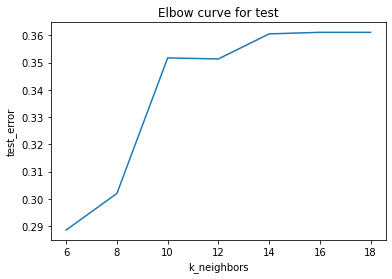

In [63]:
plt.plot(k,test)
plt.xlabel("k_neighbors")
plt.ylabel("test_error")
plt.title("Elbow curve for test")

In [64]:
data=KNN(n_neighbors=4)

In [65]:
data.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=4)

In [66]:
test_predict=data.predict(test_x)

In [67]:
k=f1_score(test_predict,test_y)

In [68]:
print("test f1 score",k)

test f1 score 0.7152317880794703


### hence our prediction is accurate upto 71.53%

### maximum accuracy is highest for Random forest classification